<a href="https://colab.research.google.com/github/fishenzone/Projects/blob/main/projects/test_tasks/Mobio/mobio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Task_1

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
import sqlite3
from IPython.core.interactiveshell import InteractiveShell  
InteractiveShell.ast_node_interactivity = "all"
plt.style.use('dark_background')

In [ ]:
adv = pd.read_csv('/content/drive/MyDrive/advertiser.csv')
stats = pd.read_csv('/content/drive/MyDrive/stats.csv')

print('Advertiser data')
adv.head()
print('\nStats data')
stats.head()

Advertiser data


,id,advertiser_id,is_active,created_at,updated_at,name
0,16,6868216434661523462,True,2021-02-05 15:27:58,2021-02-05 15:27:58,Adv1
1,15,6848952968775991302,True,2021-02-05 15:27:19,2021-02-05 15:27:19,Adv2
2,14,6874859043647651842,True,2021-02-05 11:35:16,2021-02-05 11:35:16,Adv3
3,12,6867437403552874502,True,2021-02-05 11:29:35,2021-02-05 13:39:00,Adv4
4,11,6880849063370031105,True,2021-02-05 11:28:53,2021-02-05 11:28:53,Adv5



Stats data


,id,advertiser_fk,campaign_id,adgroup_id,ad_id,impressions,clicks,installs,date,cost
0,554208,2,1685705456075778,1685705920959538,1685705929800721,55,1,0,2020-12-31,0.01
1,554052,2,1676915865016357,1676916623631397,1676916653773862,508,1,1,2020-12-31,0.11
2,554039,2,1684500040745985,1684500035192833,1684500035450897,161,4,0,2020-12-31,0.03
3,554038,2,1685514640898082,1686343960646705,1686343960647697,565,1,0,2020-12-31,0.14
4,554028,2,1685709447178242,1685709448051761,1685709437741073,388,4,0,2020-12-31,0.01


In [ ]:
relevant_id = stats.advertiser_fk.unique()
print(f'List of advertisers id: {sorted(relevant_id)}\n\
Number of unique advertisers: {stats.advertiser_fk.nunique()}')

List of advertisers id: [2, 3, 8, 10]
Number of unique advertisers: 4


In [ ]:
df_merge = pd.merge(adv, stats, how='inner', left_on=['id'], right_on=['advertiser_fk'])
df = df_merge.groupby(by=['date', 'name']).sum()[['cost', 'installs']].reset_index()
df['cpi'] = df.cost/df.installs
df.date = pd.to_datetime(df.date, infer_datetime_format=True).dt.day
df.head()

,date,name,cost,installs,cpi
0,1,Adv13,260.78,70.00,3.73
1,1,Adv6,41.54,127.00,0.33
2,1,Adv8,230.07,65.00,3.54
3,2,Adv13,434.34,57.00,7.62
4,2,Adv8,75.13,43.00,1.75


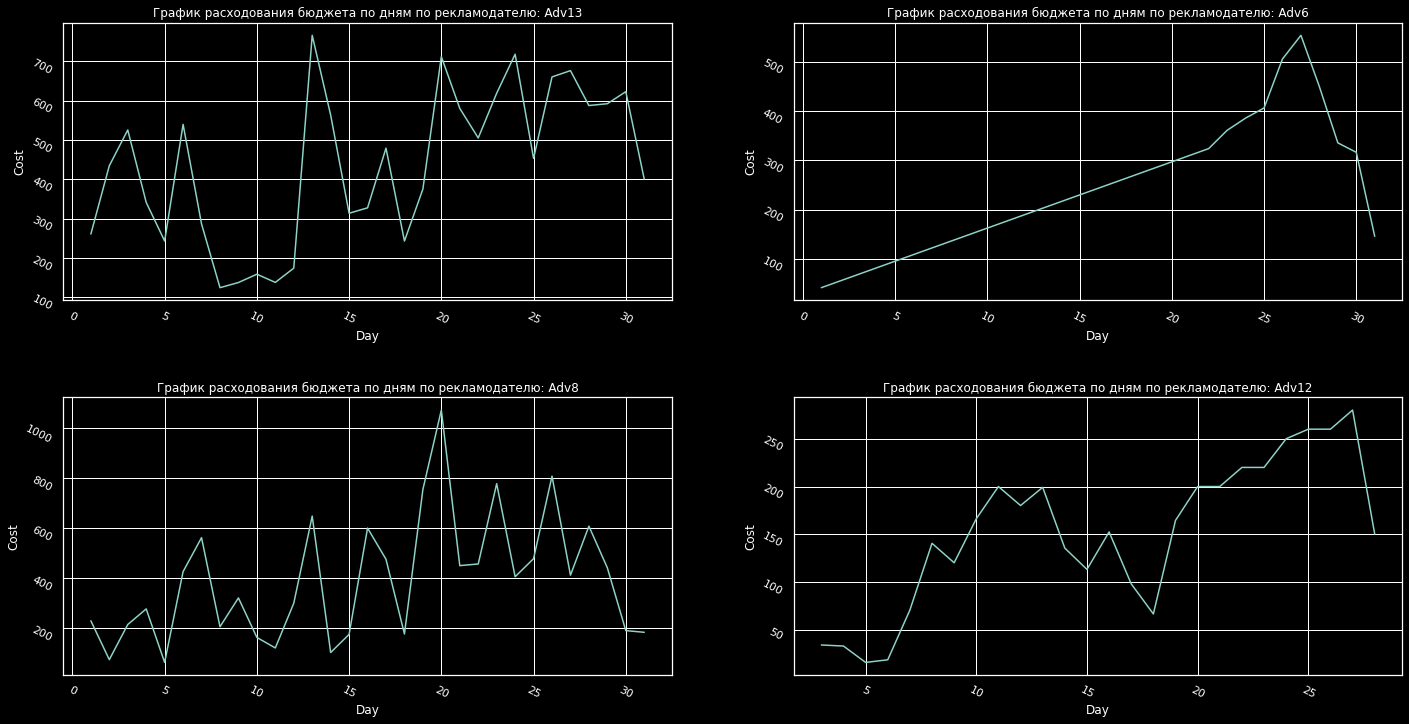

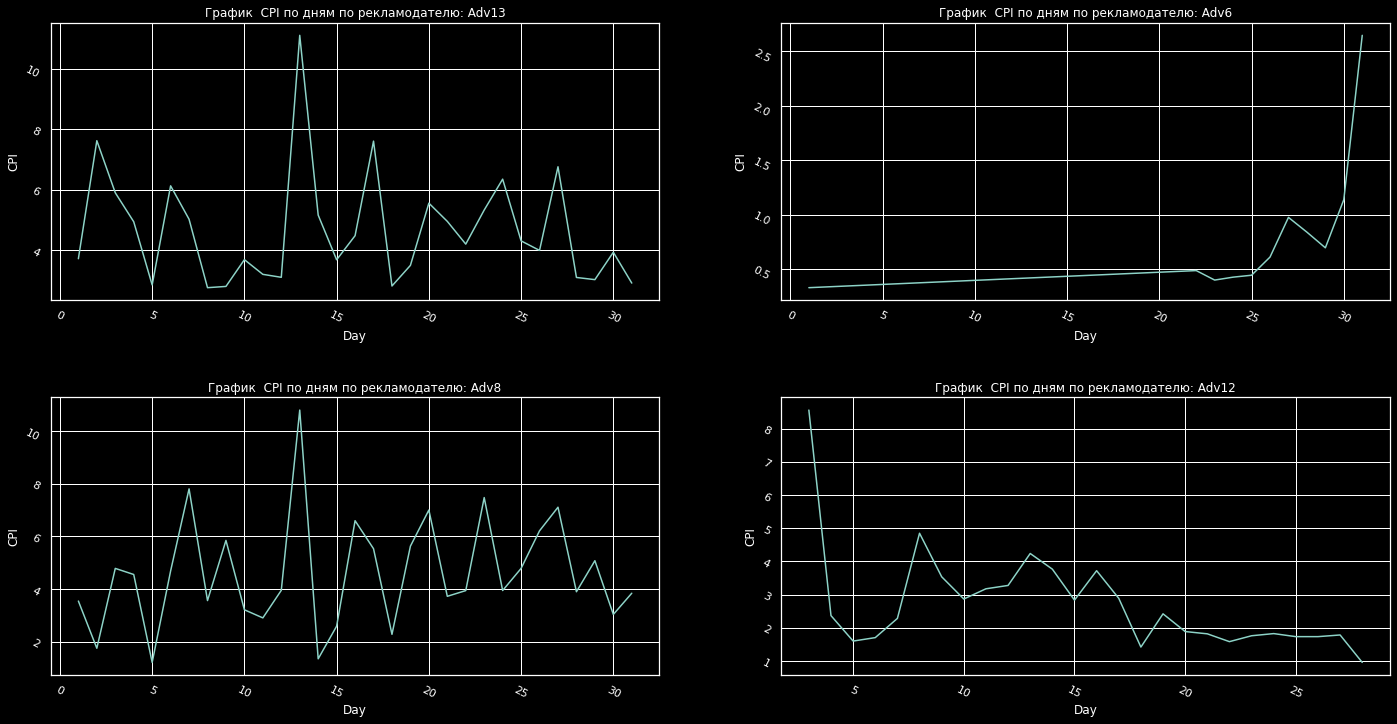

In [ ]:
def plot(df, cost='cost'):
  fig, axs = plt.subplots(2,2, figsize=(22, 12))
  fig.subplots_adjust(hspace =.35, wspace=.2)
  axs = axs.ravel()
  
  for i, x in enumerate(df.name.unique()):
    df_id = df[df.name==x]
    axs[i].tick_params(labelrotation=333)
    axs[i].set_xlabel('Day')

    if cost == 'cost': 
      axs[i].plot(df_id.date.values, df_id.cost.values)
      axs[i].set_ylabel('Cost')
      axs[i].set_title(f'График расходования бюджета по дням по рекламодателю: {x}')
    
    elif cost == 'cpi':
      axs[i].plot(df_id.date.values, df_id.cpi.values)
      axs[i].set_ylabel('CPI')
      axs[i].set_title(f'График  CPI по дням по рекламодателю: {x}')
    
    else: print('This feature is not available yet, but we\'re trying our best to deploy it!')

plot(df)
plot(df, 'cpi')

In [ ]:
print('Таблица расходования общего бюджета по всем рекламодателям по дням:\n')
# df_merge.groupby(by=['date', 'name']).sum()['cost'].reset_index()
# "по всем рекламодателям по дням" - т.е. в сумме? Здесь не совсем понял, поэтому 2 варианта(один закомментирован).
df_merge.groupby(by=['date']).sum()['cost'].reset_index()

Таблица расходования общего бюджета по всем рекламодателям по дням:



,date,cost
0,2020-12-01,532.39
1,2020-12-02,509.47
2,2020-12-03,774.57
3,2020-12-04,651.86
4,2020-12-05,323.27
5,2020-12-06,984.39
6,2020-12-07,918.94
7,2020-12-08,471.59
8,2020-12-09,579.33
9,2020-12-10,488.78


## Task_2
### Сначала создадим 2 таблицы и потом сделаем запрос.

In [ ]:
connection = sqlite3.connect('task_2.db')
cursor = connection.cursor()
create_table = '''create table adv(
  id int, 
  advertiser_id  int, 
  is_active bool, 
  created_at varchar,
  updated_at varchar,
  name varchar);
'''
cursor.execute(create_table)
file = open('/content/drive/MyDrive/advertiser.csv')
contents = csv.reader(file)
insert_records = "INSERT INTO adv(id, advertiser_id, is_active, created_at, updated_at, name) VALUES(?, ?, ?, ?, ?, ?)"
cursor.executemany(insert_records, contents)
select_all = "SELECT * FROM adv"
rows = cursor.execute(select_all).fetchall()
connection.commit()
connection.close()

In [ ]:
for row in rows[:5]:
    print(row)

('id', 'advertiser_id', 'is_active', 'created_at', 'updated_at', 'name')
(16, 6868216434661523462, 'true', '2021-02-05 15:27:58', '2021-02-05 15:27:58', 'Adv1')
(15, 6848952968775991302, 'true', '2021-02-05 15:27:19', '2021-02-05 15:27:19', 'Adv2')
(14, 6874859043647651842, 'true', '2021-02-05 11:35:16', '2021-02-05 11:35:16', 'Adv3')
(12, 6867437403552874502, 'true', '2021-02-05 11:29:35', '2021-02-05 13:39:00', 'Adv4')


In [ ]:
connection = sqlite3.connect('task_2.db')
cursor = connection.cursor()
create_table = '''create table stats(
  id int, 
  advertiser_fk int, 
  campaign_id int, 
  adgroup_id int, 
  ad_id int, 
  impressions int, 
  clicks int, 
  installs int, 
  date date, 
  cost REAL);
'''
cursor.execute(create_table)
file = open('/content/drive/MyDrive/stats.csv')
contents = csv.reader(file)
insert_records = "INSERT INTO stats(id, advertiser_fk, campaign_id, adgroup_id, ad_id, impressions, clicks, installs, date, cost) VALUES(?, ?, ?, ?, ?, ?, ?, ?, ?, ?)"
cursor.executemany(insert_records, contents)
select_all = "SELECT * FROM stats"
rows = cursor.execute(select_all).fetchall()
connection.commit()
connection.close()

In [ ]:
for row in rows[:5]:
    print(row)

('id', 'advertiser_fk', 'campaign_id', 'adgroup_id', 'ad_id', 'impressions', 'clicks', 'installs', 'date', 'cost')
(554208, 2, 1685705456075778, 1685705920959538, 1685705929800721, 55, 1, 0, '2020-12-31', 0.01)
(554052, 2, 1676915865016357, 1676916623631397, 1676916653773862, 508, 1, 1, '2020-12-31', 0.11)
(554039, 2, 1684500040745985, 1684500035192833, 1684500035450897, 161, 4, 0, '2020-12-31', 0.03)
(554038, 2, 1685514640898082, 1686343960646705, 1686343960647697, 565, 1, 0, '2020-12-31', 0.14)


### SQL запрос, позволяющий сделать таблицу, в которой будут показы, клики, инсталлы, CPI, расход по дням по каждому рекламодателю.


In [ ]:
sql_query = '''
SELECT 
  stats.date as date,
  adv.name as name,
  sum(stats.impressions) as impressions, 
  sum(stats.clicks) as clicks, 
  sum(stats.installs) as installs, 
  round(sum(stats.cost)/ sum(stats.installs), 2) as CPI,
  round(sum(cost), 2) as cost
FROM 
  stats 
  INNER JOIN adv ON stats.advertiser_fk = adv.id 
group by 
  stats.date, 
  adv.name
order by
  date, name;
'''

In [ ]:
connection = sqlite3.connect('task_2.db')
df_sql = pd.read_sql_query(sql_query, connection)
connection.close()
df_sql.head()

,date,name,impressions,clicks,installs,CPI,cost
0,2020-12-01,Adv13,876477,2301,70,3.73,260.78
1,2020-12-01,Adv6,98069,236,127,0.33,41.54
2,2020-12-01,Adv8,704722,4069,65,3.54,230.07
3,2020-12-02,Adv13,1395149,3377,57,7.62,434.34
4,2020-12-02,Adv8,232002,1438,43,1.75,75.13


### Another way


In [ ]:
connection = sqlite3.connect('task_2.db')
cursor = connection.cursor()
cursor.execute(sql_query)
result = cursor.fetchall()
for row in result[:10]:
    print(row)
connection.close()

('2020-12-01', 'Adv13', 876477, 2301, 70, 3.73, 260.78)
('2020-12-01', 'Adv6', 98069, 236, 127, 0.33, 41.54)
('2020-12-01', 'Adv8', 704722, 4069, 65, 3.54, 230.07)
('2020-12-02', 'Adv13', 1395149, 3377, 57, 7.62, 434.34)
('2020-12-02', 'Adv8', 232002, 1438, 43, 1.75, 75.13)
('2020-12-03', 'Adv12', 116807, 323, 4, 8.56, 34.23)
('2020-12-03', 'Adv13', 1443381, 3681, 89, 5.9, 525.24)
('2020-12-03', 'Adv8', 639852, 7531, 45, 4.78, 215.1)
('2020-12-04', 'Adv12', 141095, 338, 14, 2.37, 33.13)
('2020-12-04', 'Adv13', 992036, 2621, 69, 4.95, 341.26)


In [ ]:
column_names = ['date', 'name', 'impressions', 'clicks', 'installs', 'CPI', 'cost']
pd.DataFrame(result, columns=column_names).head()

,date,name,impressions,clicks,installs,CPI,cost
0,2020-12-01,Adv13,876477,2301,70,3.73,260.78
1,2020-12-01,Adv6,98069,236,127,0.33,41.54
2,2020-12-01,Adv8,704722,4069,65,3.54,230.07
3,2020-12-02,Adv13,1395149,3377,57,7.62,434.34
4,2020-12-02,Adv8,232002,1438,43,1.75,75.13


## Task_3
### Я загуглил формулу расчета тротуара:
### $b_p = \frac{N*b_n}{P}+b_B+b_Д$,

где N - интенсивность пешеходного движения, пеш/ч;

P - расчетная пропускная способность полосы пешеходного движения, пеш./ч;

bn - ширина полосы пешеходного движения( для пешеходных переходов и лестниц - 1 м, для прочих пешеходных путей - 0,75 м );

bв - полоса безопасности, составляющая 0,6 м в сторону проезжей части или велодорожки и 0,3 м в сторону застройки (наличие зеленых защитных насаждений не учитывается);

+bд - дополнительная полоса тротуара от 0,5 до 1,2 м при наличии в его пределах мачт освещения, опор контактной сети и т.п.

Полученная по первому слагаемому формулы величина ходовой части ширины тротуара должна быть округлена до ближайшего значения, кратного 0,75м.


In [ ]:
class Size:
  def __init__(self, N, P, b_n, b_B, b_D):
    self.N = N
    self.P = P
    self.b_n = b_n
    self.b_B = b_B
    self.b_D = b_D
    self.b_p = (N * b_n / P) + b_B + b_D
  
  def calc(self, base=0.75):
    return base * round(self.b_p/base)

pavement_width = Size(550, 900, 1, 0.6, 0.5)
print(f'Pavement Width: {pavement_width.calc()} meters.')

Pavement Width: 1.5 meters.
